# ASOCA Normal: Data exploration

Each of the four cells below shows **one data type** for a chosen sample (1–20). Set **`sample_id`** in each cell to the sample you want to view. Centerlines and SurfaceMeshes are **interactive 3D** (rotate/zoom in the notebook).

In [14]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pyvista as pv

import nrrd

# Interactive 3D in Jupyter (rotate/zoom Centerlines and SurfaceMeshes)
try:
    pv.set_jupyter_backend("trame")
except Exception:
    pv.set_jupyter_backend("static")  # fallback if trame not installed

DATA_ROOT = Path("data/ASOCA Normal")
if not DATA_ROOT.exists():
    DATA_ROOT = Path("../data/ASOCA Normal")


def path_for_sample(sample_id: int, folder_name: str, ext: str) -> Path:
    """Path to the file for the given sample in the given folder."""
    return DATA_ROOT / folder_name / f"Normal_{sample_id}{ext}"

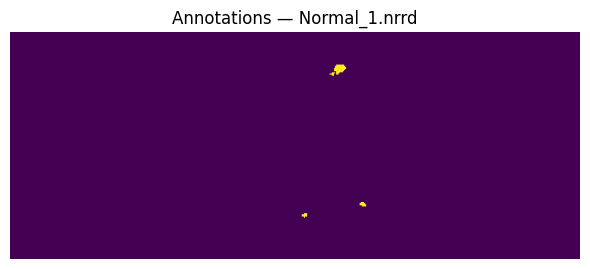

In [15]:
# --- Annotations (.nrrd): label map — set sample_id (1–20) ---
sample_id = 1

path = path_for_sample(sample_id, "Annotations", ".nrrd")
data, _ = nrrd.read(str(path))
data = np.asarray(data)
if data.ndim == 3:
    mid = data.shape[0] // 2
    slc = data[mid]
else:
    slc = data

fig, ax = plt.subplots(1, 1, figsize=(6, 6))
# Colormap that makes sparse labels stand out
ax.imshow(slc.T, cmap="viridis", origin="lower")
ax.set_title(f"Annotations — Normal_{sample_id}.nrrd")
ax.axis("off")
plt.tight_layout()
plt.show()



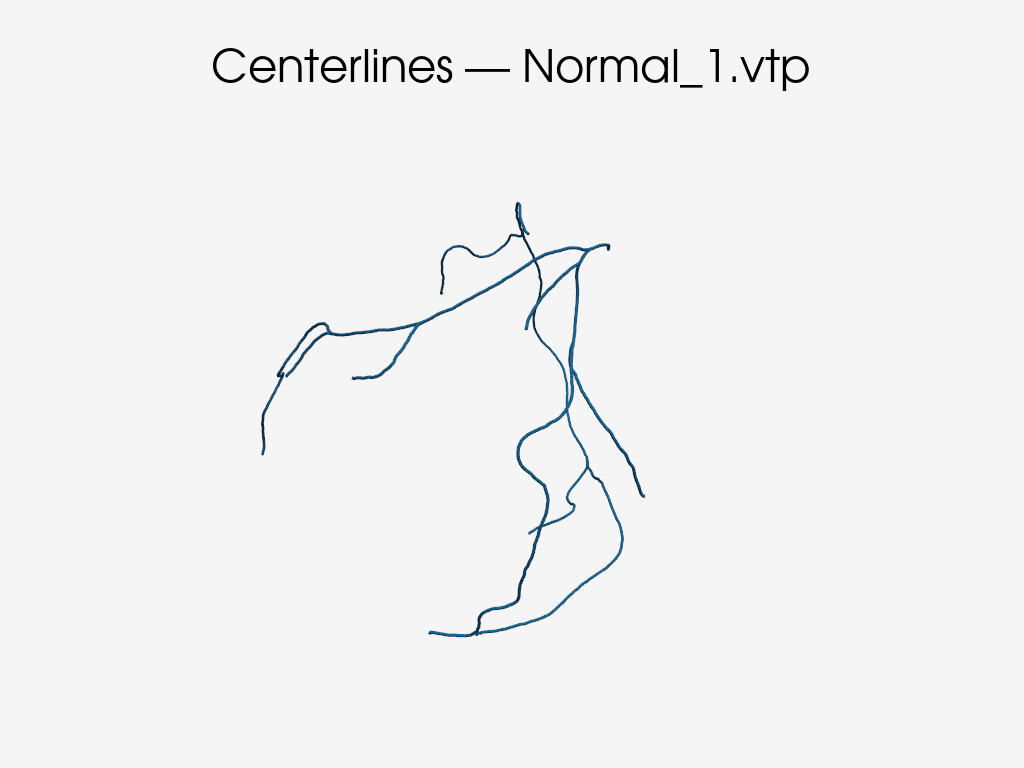

In [16]:
# --- Centerlines (.vtp): 3D centerline — set sample_id (1–20), interactive ---
sample_id = 1

path = path_for_sample(sample_id, "Centerlines", ".vtp")
mesh = pv.read(str(path))
# Thicken lines for visibility (tube); fallback to line mesh if tube fails
try:
    r = max(mesh.length / 500.0, 0.1) if hasattr(mesh, "length") and mesh.length else 0.2
    mesh = mesh.tube(radius=r)
except Exception:
    pass  # show as lines
pl = pv.Plotter(notebook=True)
pl.add_mesh(mesh, color="#1f77b4", smooth_shading=True, show_edges=False)
pl.set_background("whitesmoke")
pl.add_title(f"Centerlines — Normal_{sample_id}.vtp")
pl.camera_position = "iso"
pl.show()

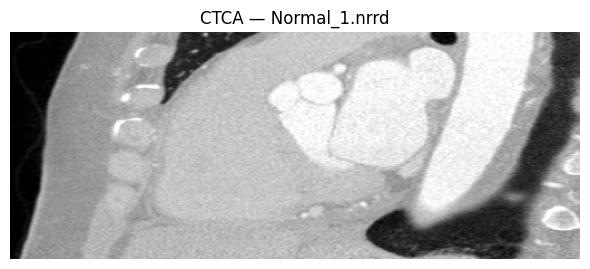

In [17]:
# --- CTCA (.nrrd): CT volume — set sample_id (1–20) ---
sample_id = 1

path = path_for_sample(sample_id, "CTCA", ".nrrd")
data, _ = nrrd.read(str(path))
data = np.asarray(data)
if data.ndim == 3:
    mid = data.shape[0] // 2
    slc = data[mid]
else:
    slc = data
# Better contrast: use percentiles to avoid very dark/bright dominance
vmin, vmax = np.percentile(slc, [2, 98])

fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.imshow(slc.T, cmap="gray", origin="lower", vmin=vmin, vmax=vmax)
ax.set_title(f"CTCA — Normal_{sample_id}.nrrd")
ax.axis("off")
plt.tight_layout()
plt.show()

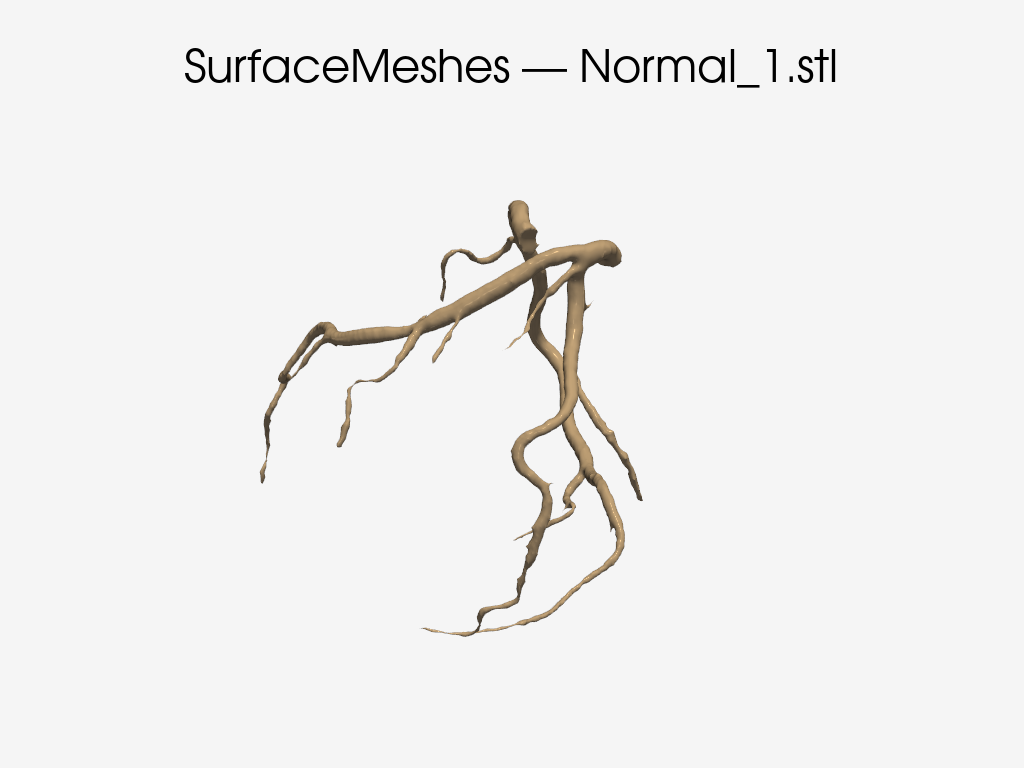

In [18]:
# --- SurfaceMeshes (.stl): 3D surface — set sample_id (1–20), interactive ---
sample_id = 1

path = path_for_sample(sample_id, "SurfaceMeshes", ".stl")
mesh = pv.read(str(path))
pl = pv.Plotter(notebook=True)
pl.add_mesh(mesh, color="tan", smooth_shading=True, show_edges=False, specular=0.5)
pl.set_background("whitesmoke")
pl.add_title(f"SurfaceMeshes — Normal_{sample_id}.stl")
pl.camera_position = "iso"
pl.show()